In [96]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [97]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
underground_2021=121
#Length of undergeound lines in miles in base year
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
###

In [98]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [99]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


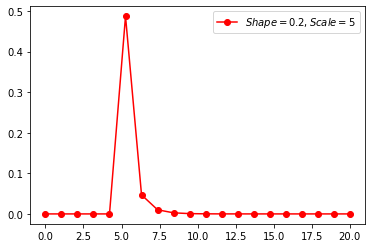

In [100]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [101]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [102]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


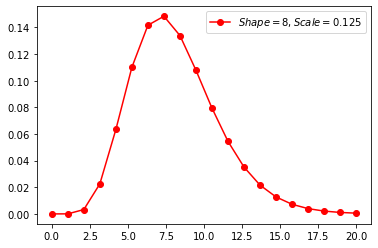

In [103]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

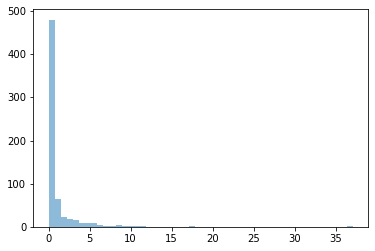

[3.47375288e-01 9.30434056e-03 6.70664973e-01 6.14128425e-02
 2.61797916e-01 1.28985073e+00 1.07549515e-11 3.54542647e-01
 1.00982563e+00 5.94548686e-01 2.04810188e-05 8.41342492e-05
 3.57968741e-02 7.09422363e+00 7.93795524e-03 2.71255039e-05
 1.68246568e-01 2.22732755e-05 2.48299160e-02 9.99354321e-01
 1.16677135e-03 1.23671832e-04 8.90692084e-02 7.19777525e-02
 2.66573911e-06 7.14583208e-01 1.52256416e+00 1.00397006e-06
 1.28530081e-02 1.00552971e-03 2.35582647e+00 7.63849675e-01
 7.20116207e-01 1.28468894e-04 8.37420175e-04 1.46199283e-01
 4.98722809e-01 1.18135772e+00 9.10689411e-04 1.87393518e-06
 1.09704944e-02 5.06725077e-01 6.69184192e+00 4.93590166e-01
 6.58062215e-15 1.19493294e-06 9.30186225e-02 1.89425654e+00
 2.96165901e-01 3.56699088e+00 3.39999197e-01 1.84103057e-04
 1.42561606e-01 1.88166867e+00 3.42830411e-01 3.89863636e-01
 1.51424891e+00 1.66039905e-09 2.45610261e-01 1.49695771e+00
 1.58089984e+00 3.58397260e-02 1.79839640e+00 5.65816468e+00
 1.95129032e-01 5.855073

In [104]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year (2021)

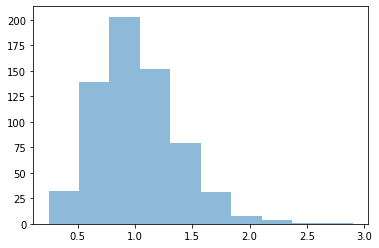

In [105]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year (2021)
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [106]:
#class Circuit:
    #def __init__(self, length, age, x):
        #self.length=length
        #self.age=age
        #self.x=x
    
#circuit_1=Circuit(25,20,0)
#circuit_2=Circuit(24,21,1)
#circuit_3=Circuit(22,22,1)
#circuit_4=Circuit(18,18,0)
#circuit_5=Circuit(25,30,1)
#circuit_6=Circuit(36,19,0)
#circuit_7=Circuit(31,29,0)
#circuit_8=Circuit(29,27,1)
#circuit_9=Circuit(25,24,0)
#circuit_10=Circuit(27,26,0)

In [107]:
random.uniform(0,1)

0.04315429221842049

In [116]:
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        #self.over_or_under = self.underground
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_random_age_2021(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year (2021)
    def get_random_length_2021(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year (2021)
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    
    # def set_lifespan(): # SET lifespan separately
    def get_current_age(self):
        #over_or_under= self.get_underground()
        if self.underground==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif self.underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x=0
        age_i_2021= self.age[i] #self.get_random_age_2021()
        age_i_t=0
        if age_i_2021<=lifespan_x:
            age_i_t= (age_i_2021)+(t-2021)
        elif age_i_2021-lifespan_x==1:
            age_i_t=1
        elif age_i_2021-lifespan_x>1:
            age_i_t=(age_i_t)+1
        return(age_i_t)
    # Determining circuit's current age in year t
    def get_age_array(self):
        age_array=[]
        for t in range (2021,underground_line['lifespan']):
            age_array.append(self.age_i_t)
        return(age_array)
    # Determining list of circuit's ages based on different ts. 
    def get_replcost_x_t(self):
        #over_or_under= self.get_underground()
        if self.underground==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif self.underground==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        else:
            lifespan_x=0
            replecost_x=0
            replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (2021,underground_line['lifespan']):
            if t==2021:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-2021)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
            return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i_t=self.get_current_age()
        capex_StatusQuo_i=0
        for t in range (2021,underground_line['lifespan']):
            replcost_x_t= replcost_x[t]
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)^(t-2021))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
            else:
                 capex_StatusQuo_i=0
            return (capex_StatusQuo_i)
    #Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def opex_x_t (self):
        #over_or_under = self.get_underground()
        age_i_t=self.get_current_age()
        replcost_x_t=self.get_replcost_x_t()
        if self.underground==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif self.underground==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        for t in range (2021,underground_line['lifespan']):
            opex_x_t=0
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
            else:
                None
            return (opex_x_t)
    #Annual operation and maintenance expenses for each line
    def opex_StatusQuo_i (self):
        opex_x_t=self.opex_x_t()
        length_i=self.get_random_length_2021()
        opex_StatusQuo_i=0
        for t in range (2021,underground_line['lifespan']):
            opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.capex_StatusQuo_i()
            opex_StatusQuo_i=self.opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def first_retire_i(self):
        age_2021=self.get_random_age_2021()
        age_2021_i=age_2021[i]
        #over_or_under= self.get_underground()
        if self.underground==0:
            lifespan_x=overhead_line['lifespan']
        elif self.underground==1:
            lifespan_x= underground_line['lifespan']
        else:
            lifespan_x=0
        first_retire_i=(lifespan_x)-(age_2021_i)+2021
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def capex_underground_i(self):
        #over_or_under= self.get_underground()
        if self.underground==0:
            self.underground=1
        length_i=self.get_random_length_2021()
        capex_underground_i=0
        rplcost_x_t=self.get_replcost_x_t()
        for t in range (2021,underground_line['lifespan']):
            capex_i=((rplcost_x_t)(length_i))/((1+r)^(t-2021))
            capex_underground_i=(capex_underground_i)+(capex_i)
        return (capex_StatusQuo_i)
    #Undergrounding capital expenses
    def opex_underground_i (self):
        #over_or_under= self.get_underground()
        opex_x_t=self.opex_x_t()
        length_i=self.get_random_length_2021()
        first_retire_i=self.first_retire_i()
        opex_underground_i=0
        for t in range (2021,underground_line['lifespan']):
            if  self.underground==1:
                opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    self.underground==1
                    opex_x_t=self.opex_x_t()
                    opex_i=((opex_x_t)(length_i))/((1+r)^(t-2021))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.capex_underground_i()
            opex_underground_i=self.opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.first_retire_i()
        length_i=self.get_random_length_2021()
        for t in range (2021,underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_2021+sumlength
            else:
                underground_t=underground_2021
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (2021,underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_random_length_2021()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [117]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    circuit_over_or_under=circuit_i.get_underground()
    #print(circuit_over_or_under)
    circuit_age_2021=circuit_i.get_random_age_2021()
    #print (circuit_age_2021)
    circuit_age_i_t_list=[]
    for t in range (2021,underground_line['lifespan']):       
        age_i_t=circuit_i.get_current_age()
        circuit_age_i_t_list=circuit_age_i_t_list.append(age_i_t)
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_over_or_under,'&','Segment age in 2021=',circuit_age_2021,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

x= [1] & Segment age in 2021= [0.034096915657544656] & Segment age in t= []
x= [0] & Segment age in 2021= [3.031625968513714] & Segment age in t= []
x= [0] & Segment age in 2021= [0.9792327043098772] & Segment age in t= []
x= [0] & Segment age in 2021= [0.0001197415942292845] & Segment age in t= []
x= [0] & Segment age in 2021= [0.07899376326652877] & Segment age in t= []
x= [1] & Segment age in 2021= [0.07940772111717659] & Segment age in t= []
x= [0] & Segment age in 2021= [0.06984469327378239] & Segment age in t= []
x= [0] & Segment age in 2021= [2.126979999231858e-13] & Segment age in t= []
x= [0] & Segment age in 2021= [0.026342505708767026] & Segment age in t= []
x= [0] & Segment age in 2021= [1.12817500125111] & Segment age in t= []
x= [1] & Segment age in 2021= [1.0302178291743211] & Segment age in t= []
x= [0] & Segment age in 2021= [0.0006644442702950792] & Segment age in t= []
x= [0] & Segment age in 2021= [0.9788287934460551] & Segment age in t= []
x= [0] & Segment age in 2

x= [0] & Segment age in 2021= [0.08687507913342692] & Segment age in t= []
x= [0] & Segment age in 2021= [0.0234110077584904] & Segment age in t= []
x= [0] & Segment age in 2021= [0.005820363709863334] & Segment age in t= []
x= [0] & Segment age in 2021= [3.734850126611663e-05] & Segment age in t= []
x= [0] & Segment age in 2021= [0.0001170317946917349] & Segment age in t= []
x= [1] & Segment age in 2021= [0.1954307435127477] & Segment age in t= []
x= [0] & Segment age in 2021= [0.022887244928205125] & Segment age in t= []
x= [0] & Segment age in 2021= [0.0030898738862297184] & Segment age in t= []
x= [0] & Segment age in 2021= [8.291233250385047e-05] & Segment age in t= []
x= [0] & Segment age in 2021= [3.0508383321126997] & Segment age in t= []
x= [0] & Segment age in 2021= [0.790921889567237] & Segment age in t= []
x= [0] & Segment age in 2021= [4.000510497848112e-09] & Segment age in t= []
x= [1] & Segment age in 2021= [5.213990286179354] & Segment age in t= []
x= [0] & Segment age

x= [0] & Segment age in 2021= [0.08453587622910239] & Segment age in t= []
x= [0] & Segment age in 2021= [11.02022562735984] & Segment age in t= []
x= [0] & Segment age in 2021= [0.041099990574498875] & Segment age in t= []
x= [0] & Segment age in 2021= [0.0032464531692316147] & Segment age in t= []
x= [0] & Segment age in 2021= [0.08728392653090251] & Segment age in t= []
x= [0] & Segment age in 2021= [0.011507648436654264] & Segment age in t= []
x= [0] & Segment age in 2021= [0.03716208485756621] & Segment age in t= []
x= [0] & Segment age in 2021= [0.8288933391975839] & Segment age in t= []
x= [1] & Segment age in 2021= [0.06558050355203776] & Segment age in t= []
x= [0] & Segment age in 2021= [0.017066236887445355] & Segment age in t= []
x= [1] & Segment age in 2021= [9.648933008765708] & Segment age in t= []
x= [0] & Segment age in 2021= [0.7710868255744154] & Segment age in t= []
x= [0] & Segment age in 2021= [2.702528715230125] & Segment age in t= []
x= [0] & Segment age in 2021

In [118]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    replcost_x_t_i=circuit_i.get_replcost_x_t()
    print(replcost_x_t_i)
    capex_StatusQuo_i=circuit_i.capex_StatusQuo_i()
    print(capex_StatusQuo_i)
    opex_x_t=circuit_i.opex_x_t()
    print(opex_x_t)
    opex_StatusQuo_i=circuit_i.opex_StatusQuo_i()
    print(opex_StatusQuo_i)
    lifecyclecost_StatusQuo=circuit_i.lifecyclecost_StatusQuo()
    print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

None
None
None
0


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [119]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
    first_retire_i=circuit_i.first_retire_i()
    print(first_retire_i)
    capex_underground_i=circuit_i.capex_underground_i()
    print(capex_underground_i)
    opex_underground_i=circuit_i.opex_underground_i()
    print(opex_underground_i)
    lifecyclecost_underground=circuit_i.lifecyclecost_underground()
    print(ifecyclecost_underground)
    underground_t=circuit_i.underground_t()
    print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2019.6060610905236
None
0


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'